## Course 4: ML Techniques for Data Analytics and Artificial Intelligence

## Assignment 3: Capstone Project
### To train a machine learning (ML) model to predict the house price using the boston housing dataset

### Learning Objective: 
+ Perform visual and EDA analysis
+ Perform activities such as model selection, training, and finalization. 
+ Perform model fine-tuning and explain the results along with the interpretations.  

### Team Members:
- Dhwani Nijhawan (Group Leader)
- Varun Lobo
- PraveenKumar Rapol
- Ray Han

**Import all essential libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read dataset from a csv file**

In [2]:
df=pd.read_csv('HouseData.csv')

**visualize the first few rows of the dataframe**

In [3]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


**Out dataset has 10 features and 1 target variable i.e. MEDV (median housing value)**

In [4]:
df.size

5621

In [5]:
df.isnull().sum().sum()

5

**Drop NAN from the dataframe**

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.size

5566

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64

### So far in the assignment we have loaded the dataset, checked for contents, identified NAN and removed them. Our dataset is now ready to be visualized.

### Let us visualize our target variable i.e. median house value

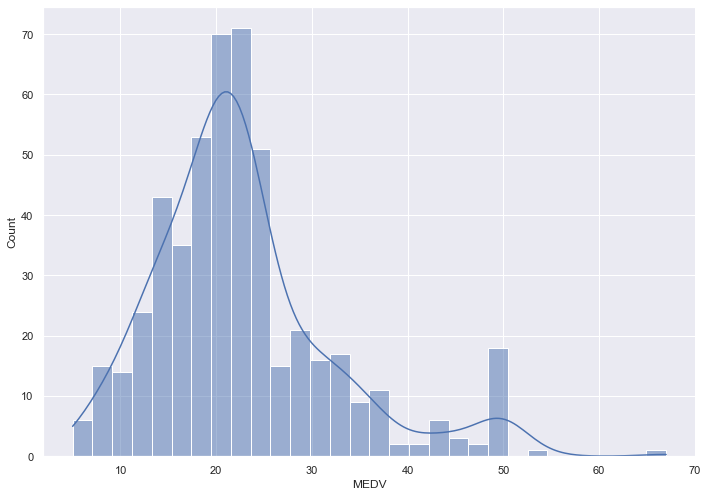

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['MEDV'],bins=30,kde=True)
plt.show()

In [11]:
df['MEDV'].mean()

22.711857707509907

### The average seems to be around 22. We also see a few outliers on the higher end.

### Let us take a look at the correlation of various feature variables to the target variable

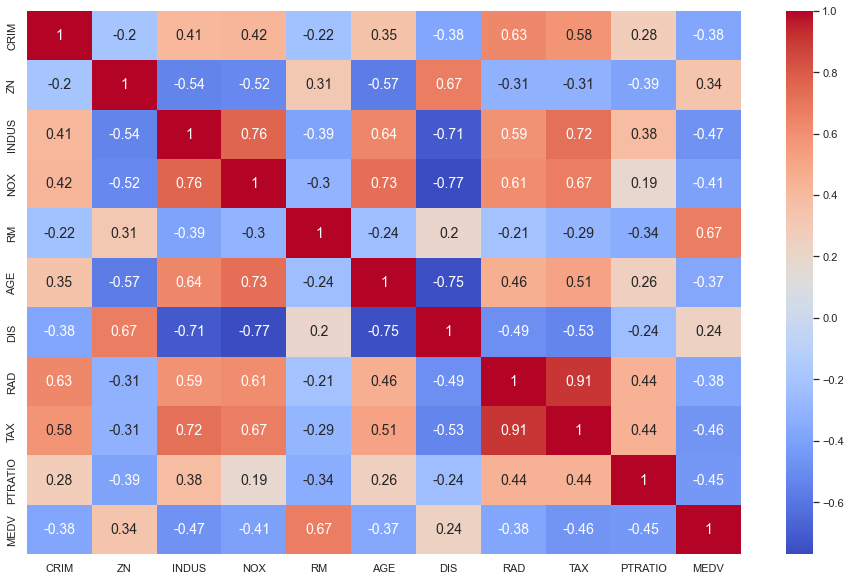

In [12]:
plt.figure(figsize = (16,10))
sns.heatmap(data=df.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":14})

plt.show()

### Let us visually observe these correlation by using pairplot

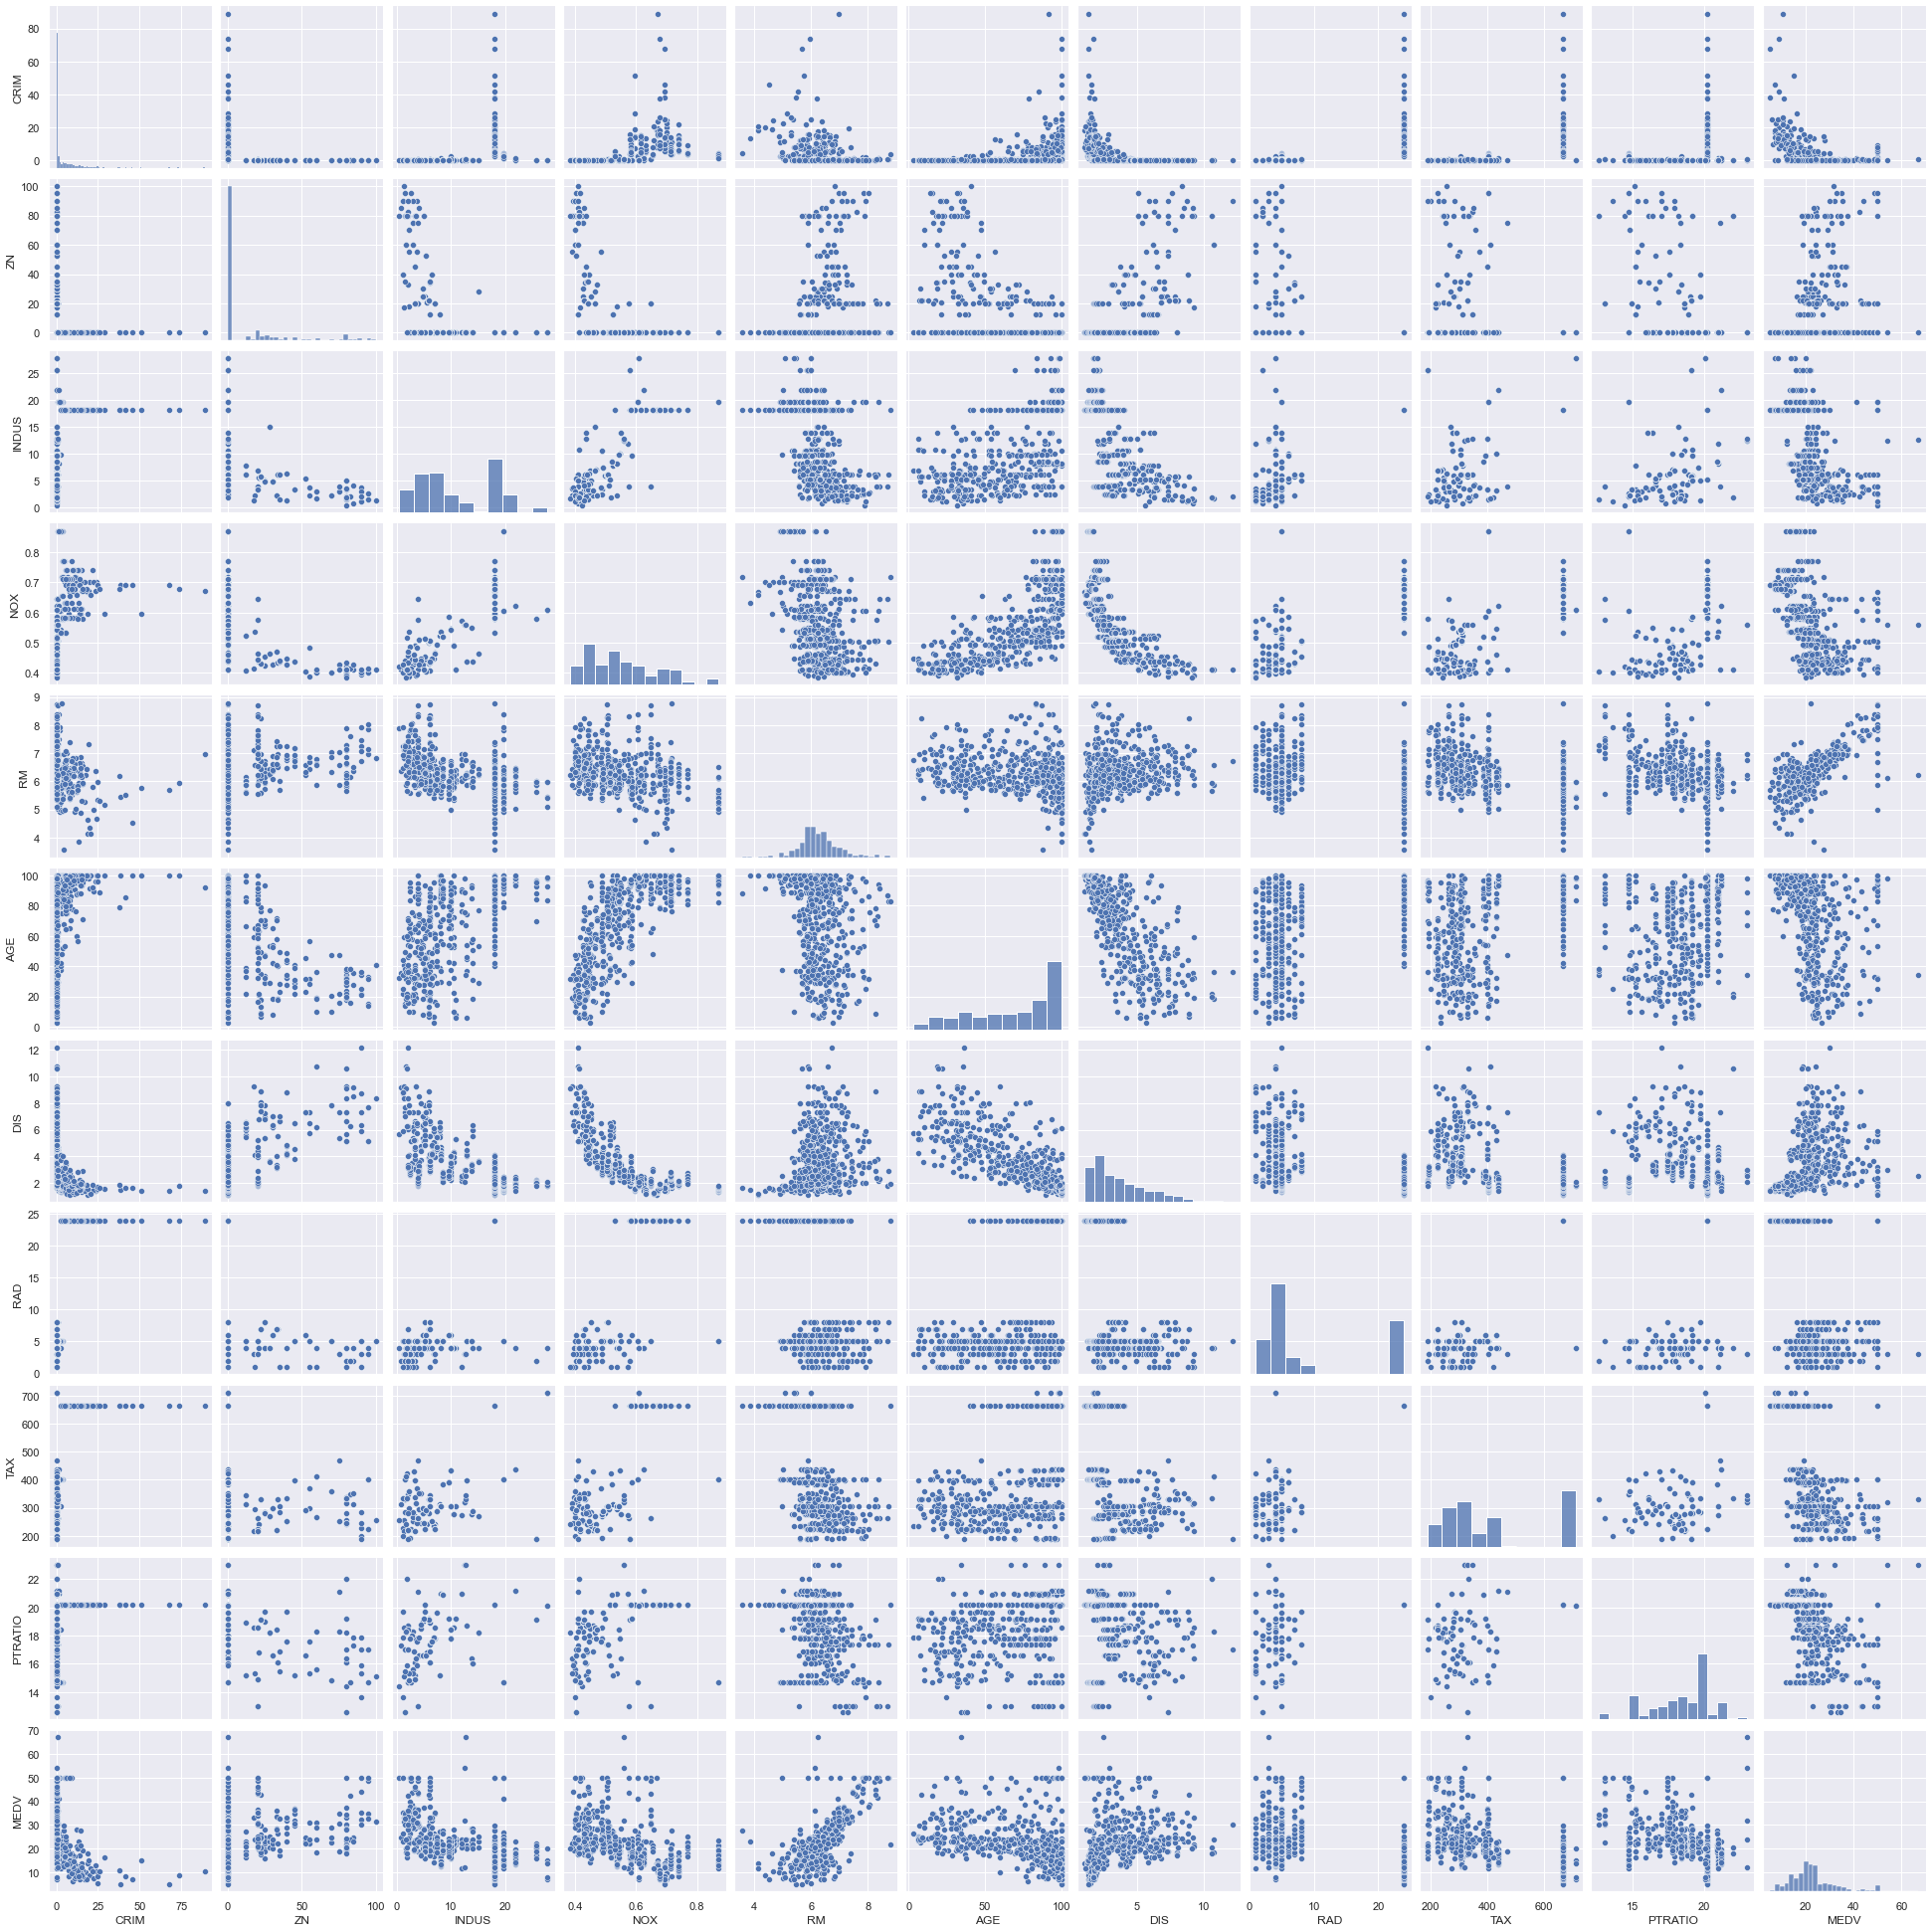

In [13]:
sns.pairplot(df)

### The highest +ive correlation with the target variable is with feature variable RM i.e. Avg number of rooms

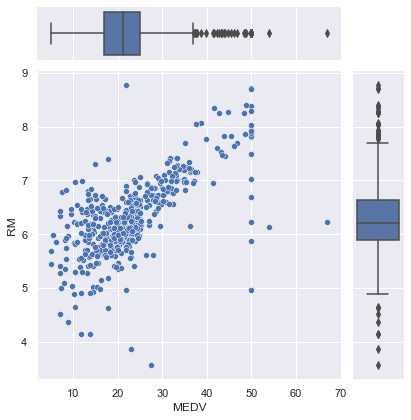

In [14]:
g = sns.JointGrid(data=df, x="MEDV", y="RM")
g.plot(sns.scatterplot, sns.boxplot)

### To create a model, we first split our data into training and testing dataset. We use the train dataset to create a model and use testing dataset for validation purpose

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=42)

In [17]:
print(X_train.size,X_test.size,y_train.size,y_test.size)

2530 2530 253 253


### We use scikit-learn’s LinearRegression to train our model using the training dataset

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(model.coef_)


[ -0.21660208   0.06083248  -0.01842265 -12.87855339   6.01791749
  -0.06996466  -1.80882363   0.19042362  -0.01591198  -0.55799064]


In [21]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'MEDV'],
      dtype='object')

### Looking at the coefficients, the features ZN, INDUS, AGE, TAX have very little effect on the overall linear equation.  

### If our model is good to predict prices, we should  have a very strong correlation between y-predicted and y-test. The difference between y-predict and y-test must be close to 0 and its distributed normally.

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

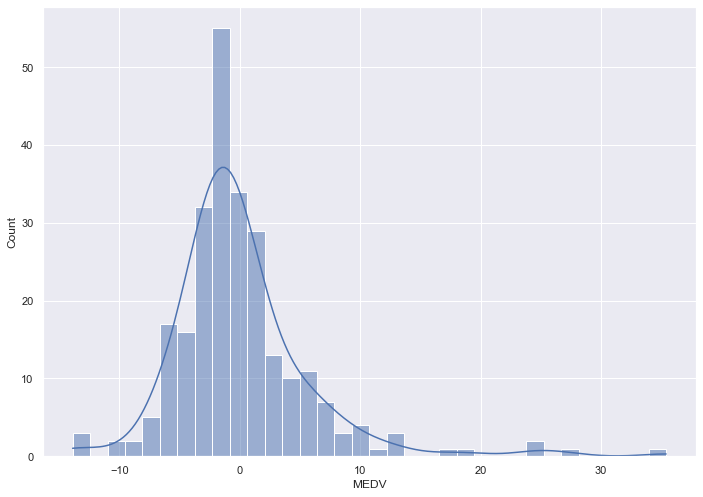

In [22]:
sns.histplot(y_test - y_pred,kde=True)

In [23]:
delta=y_test - y_pred

In [24]:
delta.mean()

0.0749374131373352

### The average of the difference between predicted and test must be closer to 0 for a model to be considered 'good'. This means there is room for improvement and finetuning our model.

## To quantify our model , let us find out the various metrics associated with our model

In [25]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", model.score(X_test, y_test))

MAE 3.800807681538215
MSE 33.80550894795329
RMSE 5.814250506123149
R2 Score: 0.6259744848129937


## To improve our model, we remove the factors that are not contributing to the overall linear equation, which are ZN, INDUS, AGE, TAX.

In [26]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


In [27]:
df_new=df.loc[:,['CRIM','NOX','RM', 'DIS','RAD','PTRATIO','MEDV']]

In [28]:
df_new.head()

,CRIM,NOX,RM,DIS,RAD,PTRATIO,MEDV
0,0.00632,0.538,6.575,4.0900,1,15.3,24.0
1,0.02731,0.469,6.421,4.9671,2,17.8,21.6
2,0.02729,0.469,7.185,4.9671,2,17.8,34.7
3,0.03237,0.458,6.998,6.0622,3,18.7,33.4
4,0.06905,0.458,7.147,6.0622,3,18.7,36.2


In [29]:
X_new = df_new.iloc[:,:-1]
y_new = df_new.iloc[:,-1]
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new,test_size=0.40,random_state=42)

In [30]:
from sklearn.linear_model import Lasso
model_new = Lasso(alpha=0.1)
model_new.fit(X_train_new, y_train_new)

Lasso(alpha=0.1)

In [31]:
model_new.coef_

array([-0.21896205, -0.        ,  7.82611916, -0.17951523, -0.12604935,
       -0.50425752])

In [32]:
y_pred_new = model_new.predict(X_test_new)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

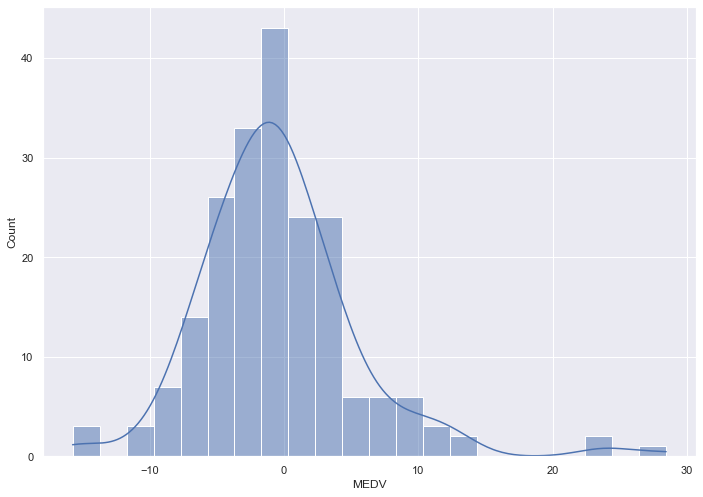

In [33]:
sns.histplot(y_test_new - y_pred_new,kde=True)

In [34]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test_new, y_pred_new))
print("MSE", metrics.mean_squared_error(y_test_new, y_pred_new))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_new)))
print("R2 Score:", model_new.score(X_test_new, y_test_new))

MAE 4.1864590828167
MSE 34.85636457104988
RMSE 5.903927893449401
R2 Score: 0.5749426000408764


## The errors have not changed significantly since the attributes that were removed, were not contributing to the linearity of the model. This was expected. 


### We can try and increase the model accuracy by tyring to remove the outliers

In [35]:
cols = ['MEDV'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


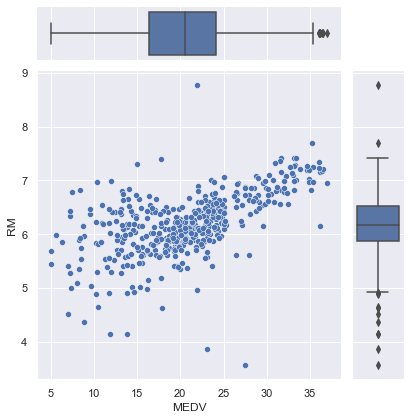

In [36]:
g = sns.JointGrid(data=df, x="MEDV", y="RM")
g.plot(sns.scatterplot, sns.boxplot)

In [37]:
from sklearn.model_selection import train_test_split
X_new = df.iloc[:,:-1]
y_new = df.iloc[:,-1]
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new,test_size=0.50,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

y_pred_new = model_new.predict(X_test_new)

In [39]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test_new, y_pred_new))
print("MSE", metrics.mean_squared_error(y_test_new, y_pred_new))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_new)))
print("R2 Score:", model_new.score(X_test_new, y_test_new))

MAE 2.9194703926928147
MSE 14.636037763658095
RMSE 3.8257074853754953
R2 Score: 0.6548884470318223


## SVM Support Vector Regression Model

In [40]:
from sklearn.svm import SVR
svr = SVR(kernel= 'linear', gamma='scale')
svr.fit(X_train_new,y_train_new)
y_pred_SVM_new = svr.predict(X_test_new)


In [41]:
print("MAE", metrics.mean_absolute_error(y_test_new, y_pred_SVM_new))
print("MSE", metrics.mean_squared_error(y_test_new, y_pred_SVM_new))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_SVM_new)))
print("R2 Score:", svr.score(X_test_new, y_test_new))

MAE 2.9076439823853693
MSE 15.314574959770123
RMSE 3.913384080277596
R2 Score: 0.638888828195203


## RandomForest Regression Model

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_new,y_train_new)
y_pred_DT_new = rf.predict(X_test_new)

print("MAE", metrics.mean_absolute_error(y_test_new, y_pred_DT_new))
print("MSE", metrics.mean_squared_error(y_test_new, y_pred_DT_new))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_DT_new)))
print("R2 Score:", rf.score(X_test_new, y_test_new))

MAE 2.2689871794871803
MSE 9.72532211538462
RMSE 3.118544871472049
R2 Score: 0.7706810359091831


## Decision Tree Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train_new, y_train_new)

In [44]:
DT_reg

DecisionTreeRegressor(max_depth=6)

In [45]:

print(DT_reg.score(X_test_new,y_test_new))

0.605048750628461


## R^2 Comparion between various algorithms

Text(0, 0.5, 'R^2 values')

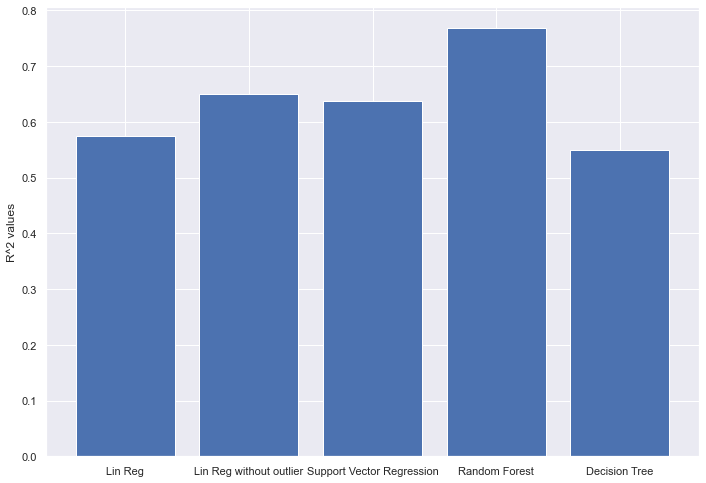

In [46]:
Rsq=[0.575, 0.65, 0.638, 0.768,0.55]
algo=['Lin Reg', 'Lin Reg without outlier', 'Support Vector Regression', 'Random Forest', 'Decision Tree']
plt.bar(algo, Rsq)
plt.ylabel("R^2 values")